In [85]:
from scipy import signal

import matplotlib.pyplot as plt

import numpy as np

# Exercice 1

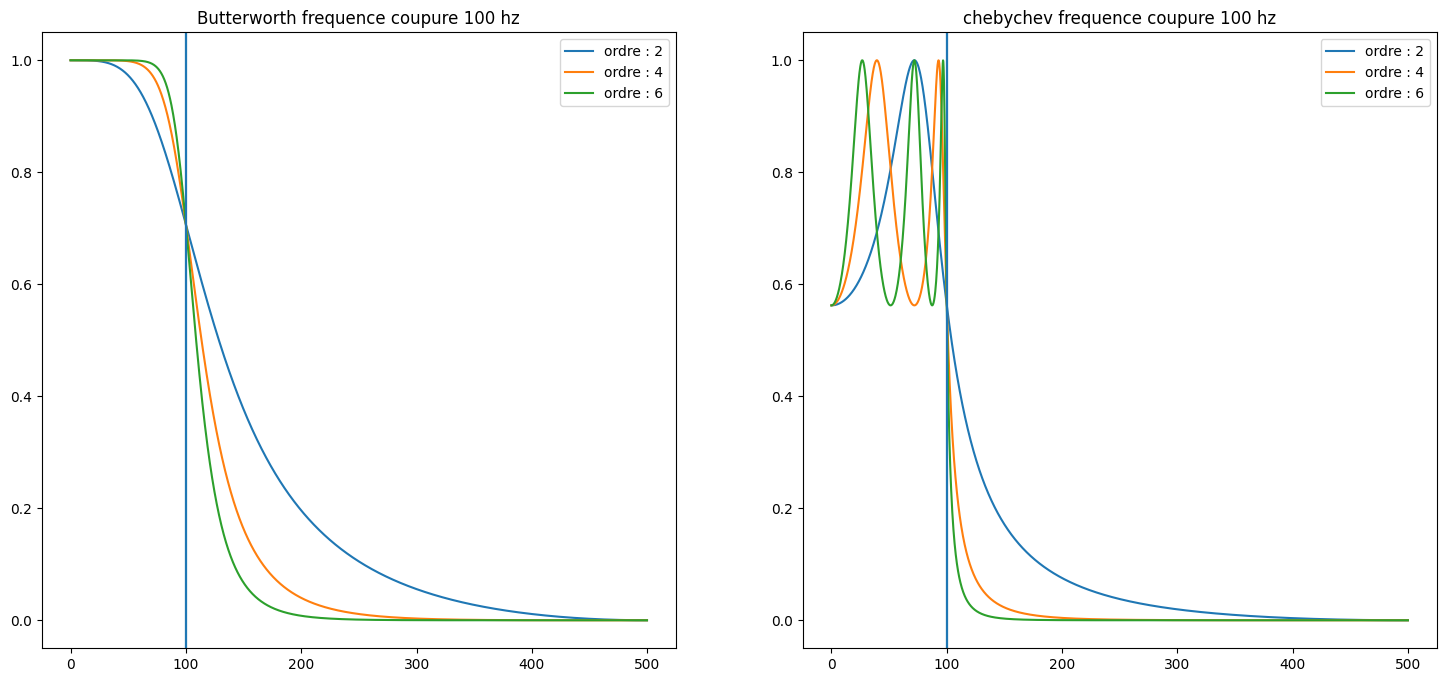

In [45]:
orders = [2, 4, 6]
frequence_attenuation = 100
fs = 1000


fig, (butter_plot, cheby_plot) = plt.subplots(1, 2, figsize=(18, 8))

butter_plot.set_title(f"Butterworth frequence coupure {frequence_attenuation} hz")
cheby_plot.set_title(f"chebychev frequence coupure {frequence_attenuation} hz")
butter_plot.plot()
for order in orders:
    butter_freq, butter_amplitide = signal.freqz(
        *signal.butter(order, frequence_attenuation, fs=fs), 
        worN=2000
        )


    cheby_freq, cheby_amplitide = signal.freqz(
        *signal.cheby1(order, 5, frequence_attenuation, fs=fs),
        worN=2000
    )

    butter_plot.plot((fs*.5/np.pi)*butter_freq, np.abs(butter_amplitide), label=f"ordre : {order}")
    cheby_plot.plot((fs*.5/np.pi)*cheby_freq, np.abs(cheby_amplitide), label=f"ordre : {order}")

    butter_plot.axvline(frequence_attenuation)
    cheby_plot.axvline(frequence_attenuation)


    butter_plot.legend()
    cheby_plot.legend()


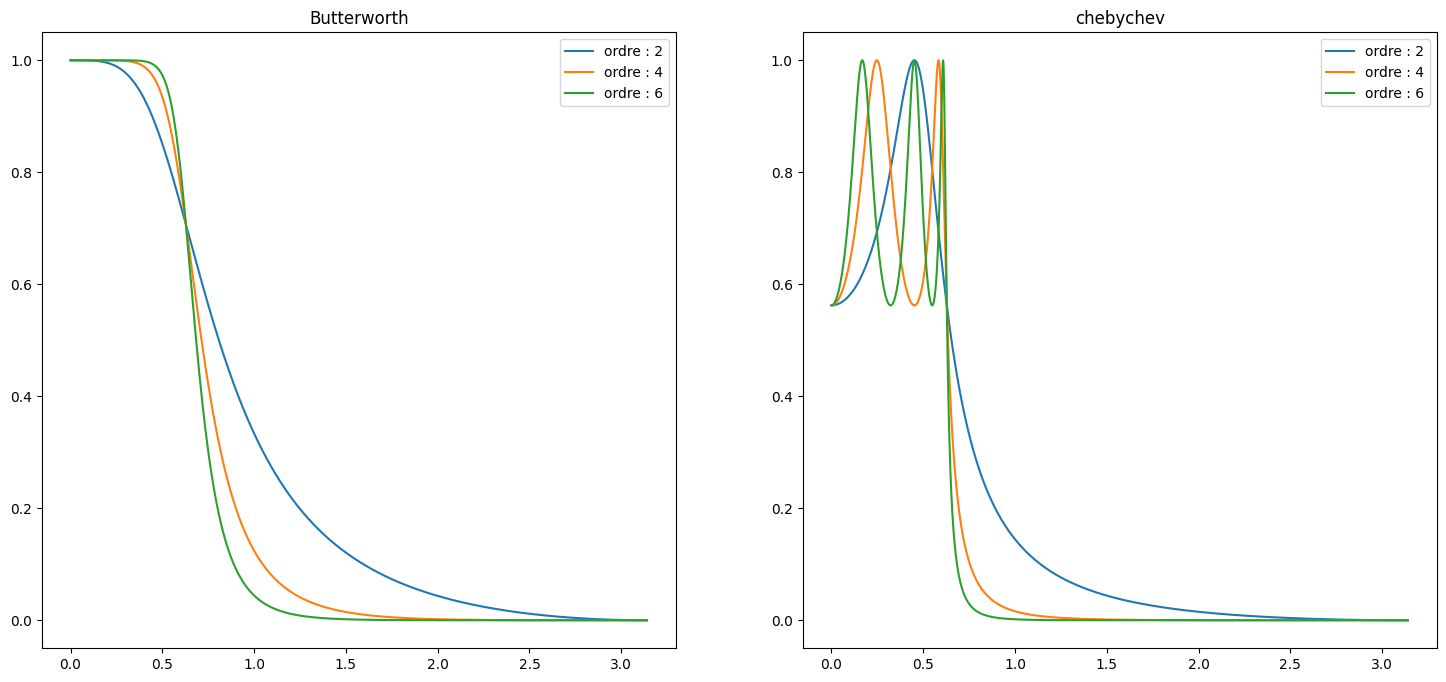

In [43]:
orders = [2, 4, 6]
frequence_attenuation = 100
fs = 1000



fig, (butter_plot, cheby_plot) = plt.subplots(1, 2, figsize=(18, 8))

butter_plot.set_title("Butterworth")
cheby_plot.set_title("chebychev")
butter_plot.plot()
for order in orders:
    butter_freq, butter_amplitide = signal.freqz(
        *signal.butter(order, frequence_attenuation, fs=fs), 
        worN=2000
        )


    cheby_freq, cheby_amplitide = signal.freqz(
        *signal.cheby1(order, 5, frequence_attenuation, fs=fs),
        worN=2000
    )

    butter_plot.plot(butter_freq, np.abs(butter_amplitide), label=f"ordre : {order}")
    cheby_plot.plot(cheby_freq, np.abs(cheby_amplitide), label=f"ordre : {order}")

    # butter_plot.axvline(frequence_attenuation/fs/.5/np.pi)
    # cheby_plot.axvline(frequence_attenuation*fs*.5/np.pi)


    butter_plot.legend()
    cheby_plot.legend()

# Exercice 2

## le signal x(t) sur l’intervalle de temps [0, 1]

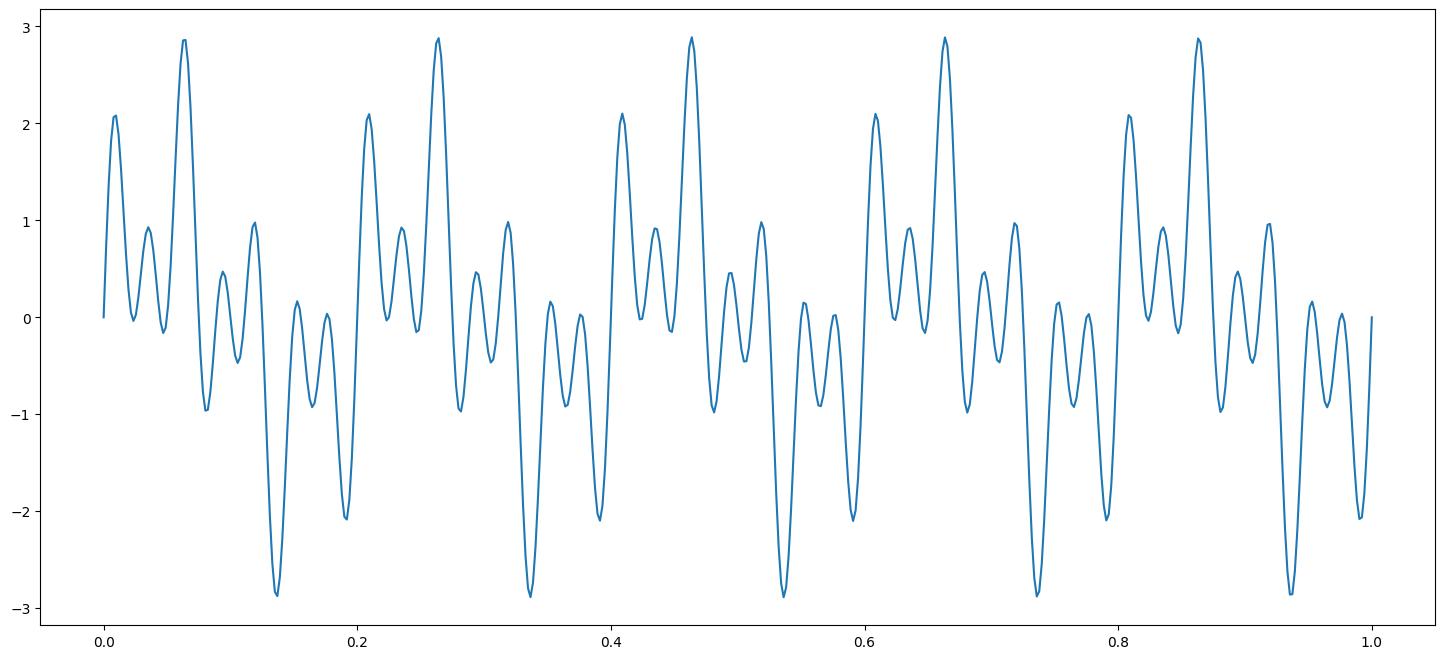

In [83]:
f = np.array([5, 20, 35])

fe = 512
xt = lambda t : np.sum([np.sin(2*np.pi*fi*t) for fi in f])
t = np.linspace(0, 1, fe)
x_signal = np.vectorize(xt)(t)







plt.figure(figsize=(18, 8))
plt.plot(t, x_signal)

## Affichage du spectre

### -fe a fe

In [75]:
from numpy.fft import fft

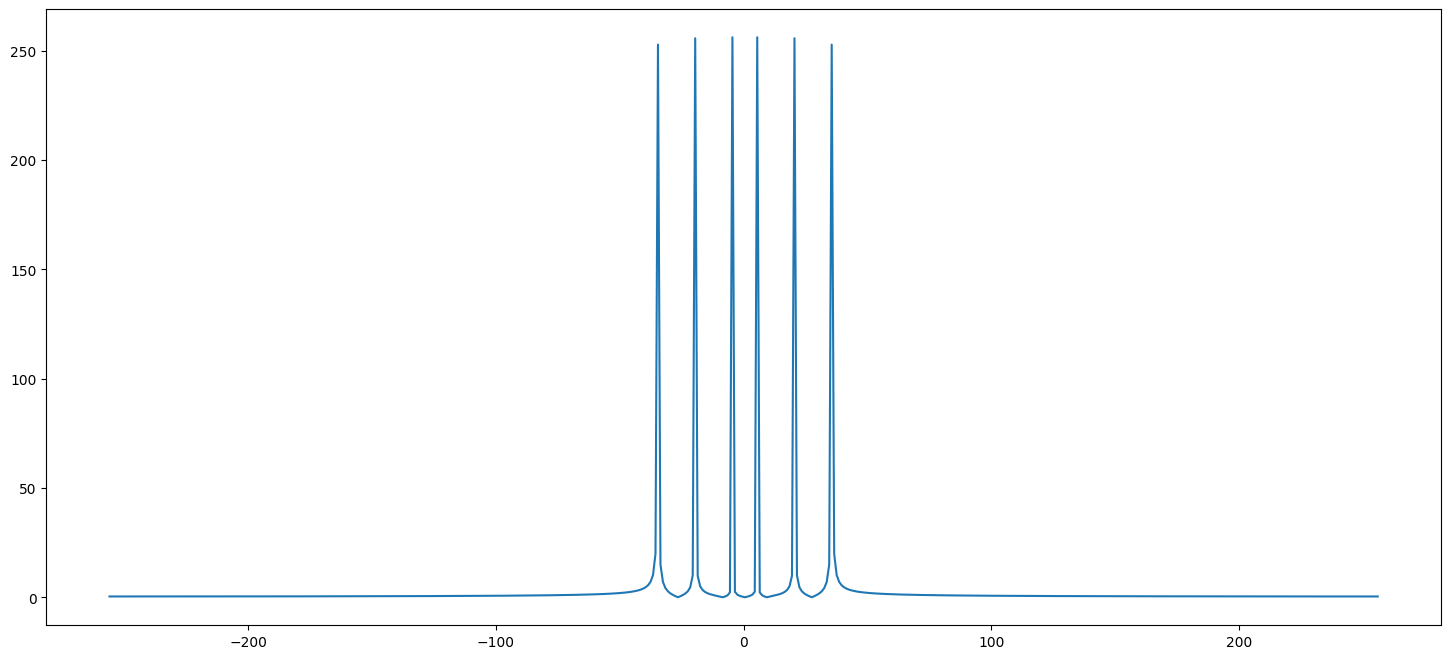

In [84]:
plt.figure(figsize=(18, 8))

f = np.linspace(-fe/2, fe/2, fe)


plt.plot(f, np.abs(np.fft.fftshift(fft(x_signal, fe))))


## 3 - Pour eliminer f2 on creer un filtre coupe bande

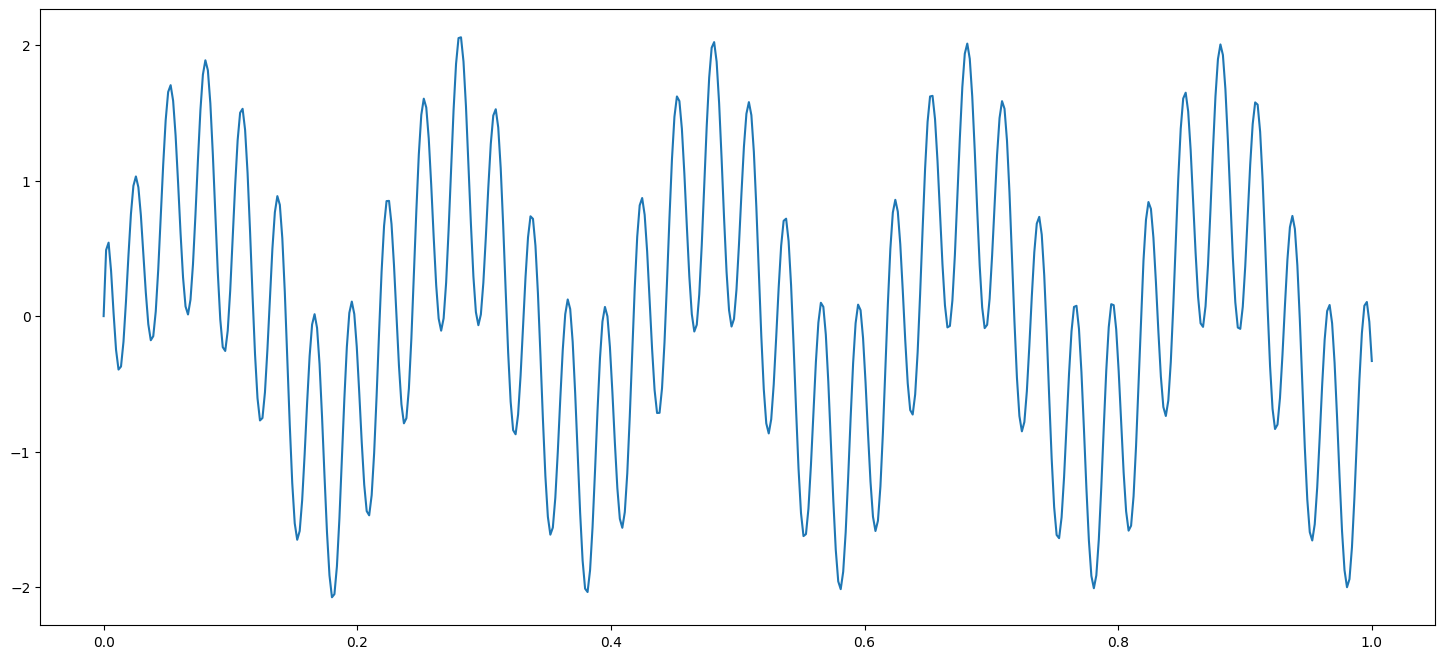

In [101]:
sos = signal.butter(10, [15, 25], 'bandstop',fs=fe, output='sos')

filtered = signal.sosfilt(sos, x_signal)


plt.figure(figsize=(18, 8))
plt.plot(t, filtered)

## Spectrte du signal filtré

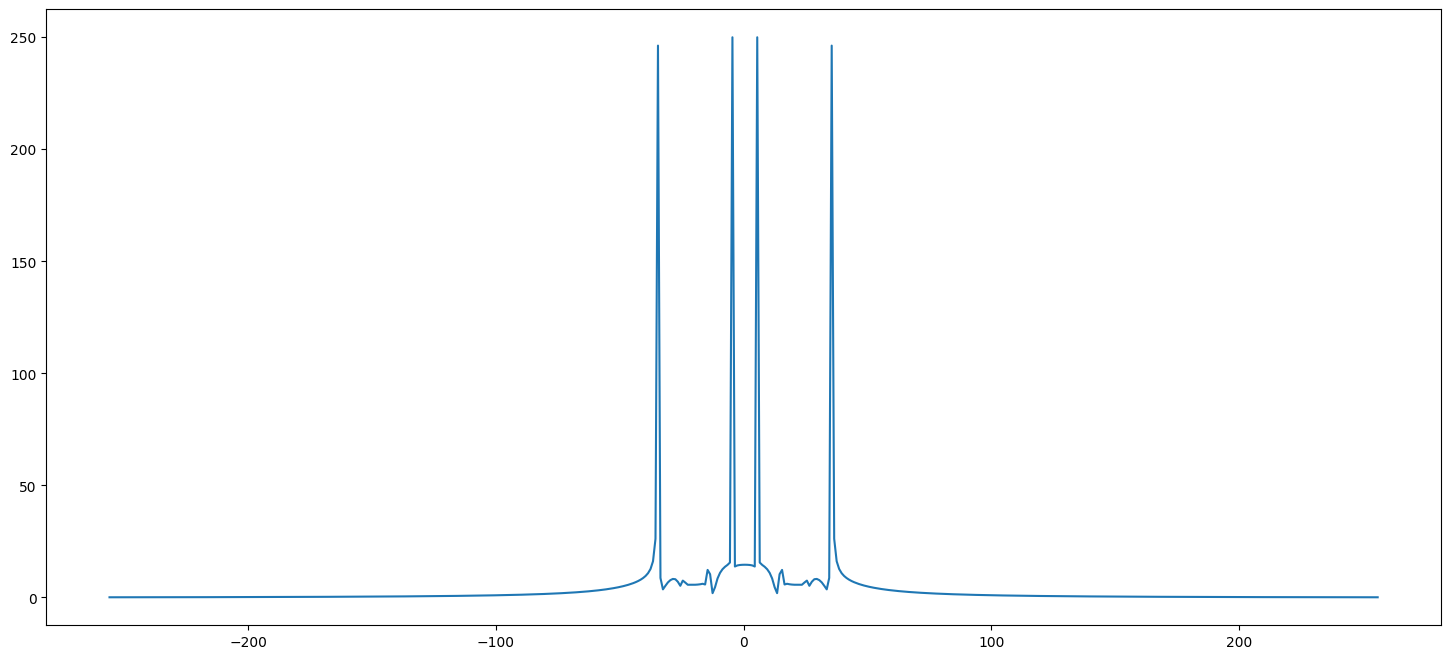

In [102]:
plt.figure(figsize=(18, 8))

f = np.linspace(-fe/2, fe/2, fe)


plt.plot(f, np.abs(np.fft.fftshift(fft(filtered, fe))))


Erreur comises

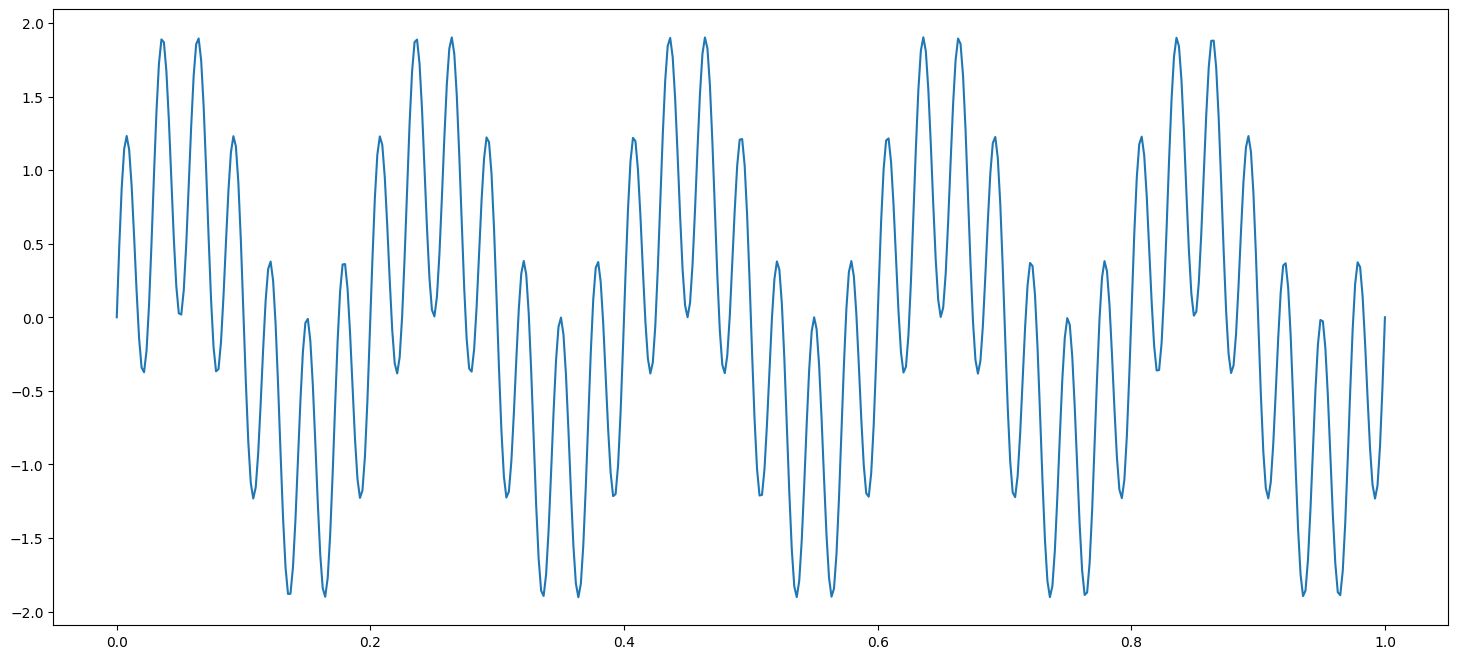

In [104]:
f = np.array(([5, 35]))
xt = lambda t : np.sum([np.sin(2*np.pi*fi*t) for fi in f])

signal_attendu = np.vectorize(xt)(t)

plt.figure(figsize=(18, 8))
plt.plot(t, signal_attendu)

erreurs MAE

In [110]:
n= signal_attendu.size
errors_mae = np.sum(np.abs(signal_attendu - filtered))/n
errors_mse = np.sum((signal_attendu - filtered)**2)/n
errors_rmse = np.sqrt(np.sum((signal_attendu - filtered)**2)/n)

In [111]:
print("Mean absoilute error :", errors_mae)
print("Mean square error :", errors_mse)
print("root Mean square error :", errors_rmse)

Mean absoilute error : 1.2748991271599133
Mean square error : 2.195929718588063
root Mean square error : 1.4818669706110812


## resultat en fonction le l'ordre du filtre

In [117]:

orders = list(range(1, 13))
frequence_supprimer = 20

soss = [signal.butter(order, [frequence_supprimer-2, frequence_supprimer+2], 'bandstop',fs=fe, output='sos') for order in orders]

filtered_signals = [signal.sosfilt(sos, x_signal) for sos in soss]
errors_maes = [np.sum(np.abs(signal_attendu - filtered_signal))/n for filtered_signal in filtered_signals]

argmin = np.argmin(errors_maes)
best_order = orders[argmin]
minimal_error = errors_maes[argmin]
best_filter = soss[argmin]
best_filetered_signal= filtered_signals[argmin]


In [118]:
print("Meilleur ordre de filter : ", best_order)
print("erreurs calculé : ", minimal_error)

Meilleur ordre de filter :  1
erreurs calculé :  0.1400187634983918
